Lien vers le dataset : https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

# Bibliothèque

In [1]:
from google.colab import drive # pour importer le dataset depuis drive
import pandas as pd # pr manipuler les dataframes
import numpy as np # pour créer des matrices
import matplotlib.pyplot as plt # pour tracer des graphiques
import seaborn as sns # pour la visualisation de la data

# Chargement du dataset

In [2]:
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Projet-MachineLearning/dataset.csv') # chemin vers le dataset
#print(dataset.head())
print(dataset.shape)
print(dataset.columns)
#print(dataset.columns)

Mounted at /content/drive
(6819, 96)
Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Gr

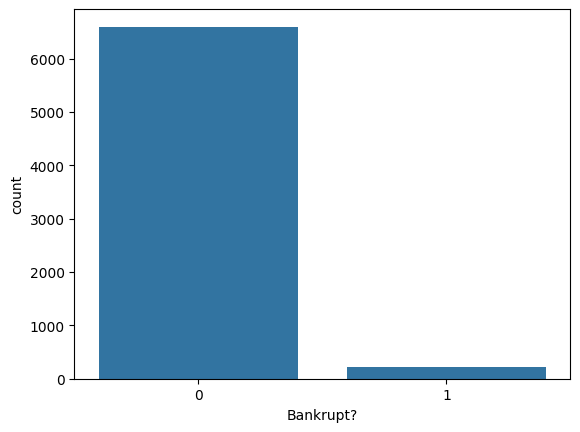

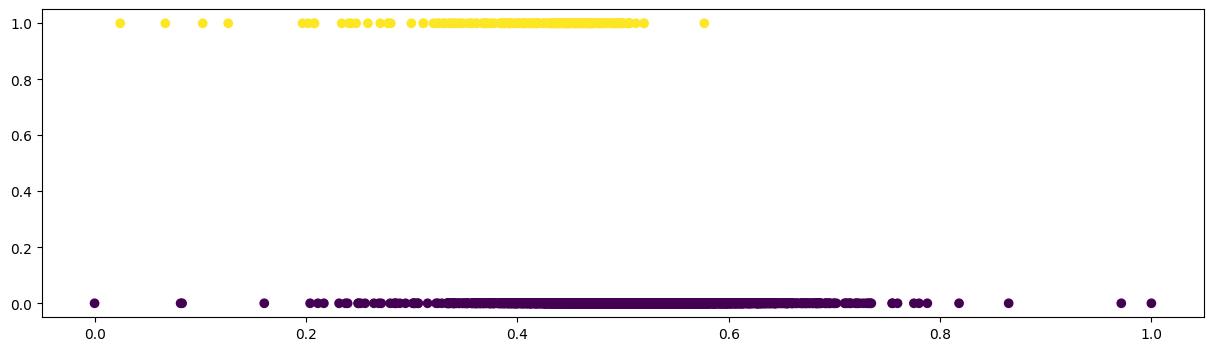

In [12]:
X = dataset.drop('Bankrupt?', axis=1)

y = dataset['Bankrupt?']
import seaborn as sns
sns.countplot(x=y)
plt.figure(figsize=(15, 4))

plt.scatter(X.iloc[:, 0], y, c=y)
# plt.scatter(X['column_name1'], X['column_name2'], c=y)

# Arbre de décision

# Impureté de Gini

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# séparation des données de test et train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
clf = DecisionTreeClassifier()
%time
clf.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


DecisionTreeClassifier()

In [5]:

# profondeur de l'arbre
max_depth = clf.get_depth()
print(max_depth) # on a 20 niveaux : noeud racine + 19 couches


16


# Evaluation

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1319
           1       0.29      0.27      0.28        45

    accuracy                           0.95      1364
   macro avg       0.63      0.62      0.63      1364
weighted avg       0.95      0.95      0.95      1364



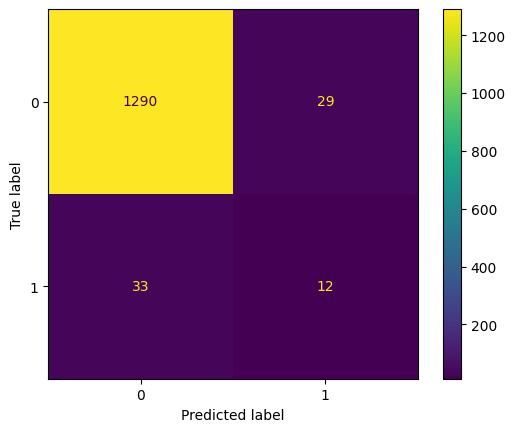

In [6]:
y_pred = clf.predict(X_test)
from sklearn import metrics
# rapport de classification
print(metrics.classification_report(y_test, y_pred))
# matrice de confusion
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_diplay = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=clf.classes_)
cm_diplay.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

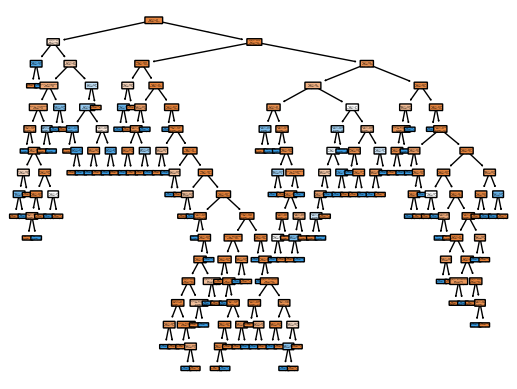

In [7]:
from sklearn import tree
tree.plot_tree(clf, rounded=True, filled=True)
plt.show

# Entropie

In [8]:
clf = DecisionTreeClassifier(criterion='entropy')
%time
clf.fit(X_train, y_train)

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 21.2 µs


DecisionTreeClassifier(criterion='entropy')

In [9]:
max_depth = clf.get_depth()
print(max_depth) # on a 20 niveaux : noeud racine + 19 couches

13


<function matplotlib.pyplot.show(close=None, block=None)>

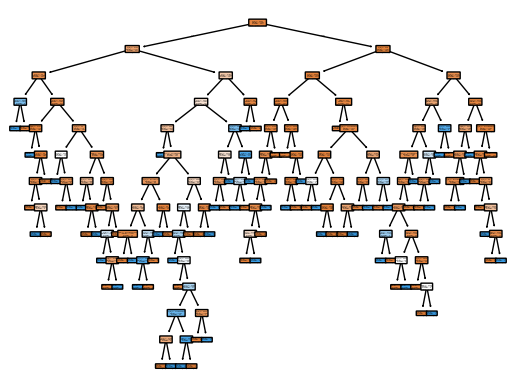

In [10]:
tree.plot_tree(clf, rounded=True, filled=True)
plt.show

# Remarque
L'entrainement est plus court en utilisant l'impureté de Gini

# Evaluation

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1319
           1       0.32      0.27      0.29        45

    accuracy                           0.96      1364
   macro avg       0.65      0.62      0.63      1364
weighted avg       0.95      0.96      0.95      1364



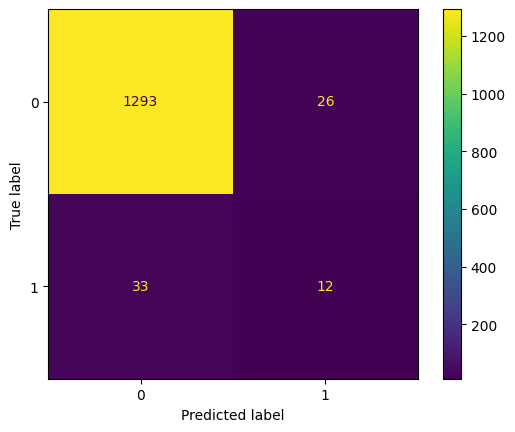

In [11]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()